In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readtxt(filename):
    data = np.loadtxt(filename, delimiter=' ')
    return data

In [3]:
positions = readtxt('./positions2.txt')

In [4]:
positions = positions.reshape((-1, 28*28, 2))

In [5]:
positions.shape

(5000, 784, 2)

In [6]:
space = 0.1
radius = 0.5
dx = 2 * radius + space
dy = 2 * radius + space
init_pos = []
for i in range(28):
    for j in range(28):
        init_pos.append([i * dx - (28-1)/2 * dx , j * dy - (28-1)/2 * dy])
init_pos = np.array(init_pos)

In [7]:
def show_dataset(dataset, name):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()
    sample_indexs = np.random.randint(0, dataset.shape[0], 9)
    for i in range(9):
        axes[i].scatter(dataset[sample_indexs[i], :, 0], dataset[sample_indexs[i], :, 1], s=1, label='new pos')
        axes[i].scatter(init_pos[:, 0], init_pos[:, 1], s=1, alpha=0.5, label='init pos')
        axes[i].set_xlim(-30, 30)
        axes[i].set_ylim(-30, 30)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].legend()
        axes[i].set_title('sample {}'.format(sample_indexs[i]))
    fig.suptitle(name, fontsize=14, y=0.95, x=0.5)
    plt.show()

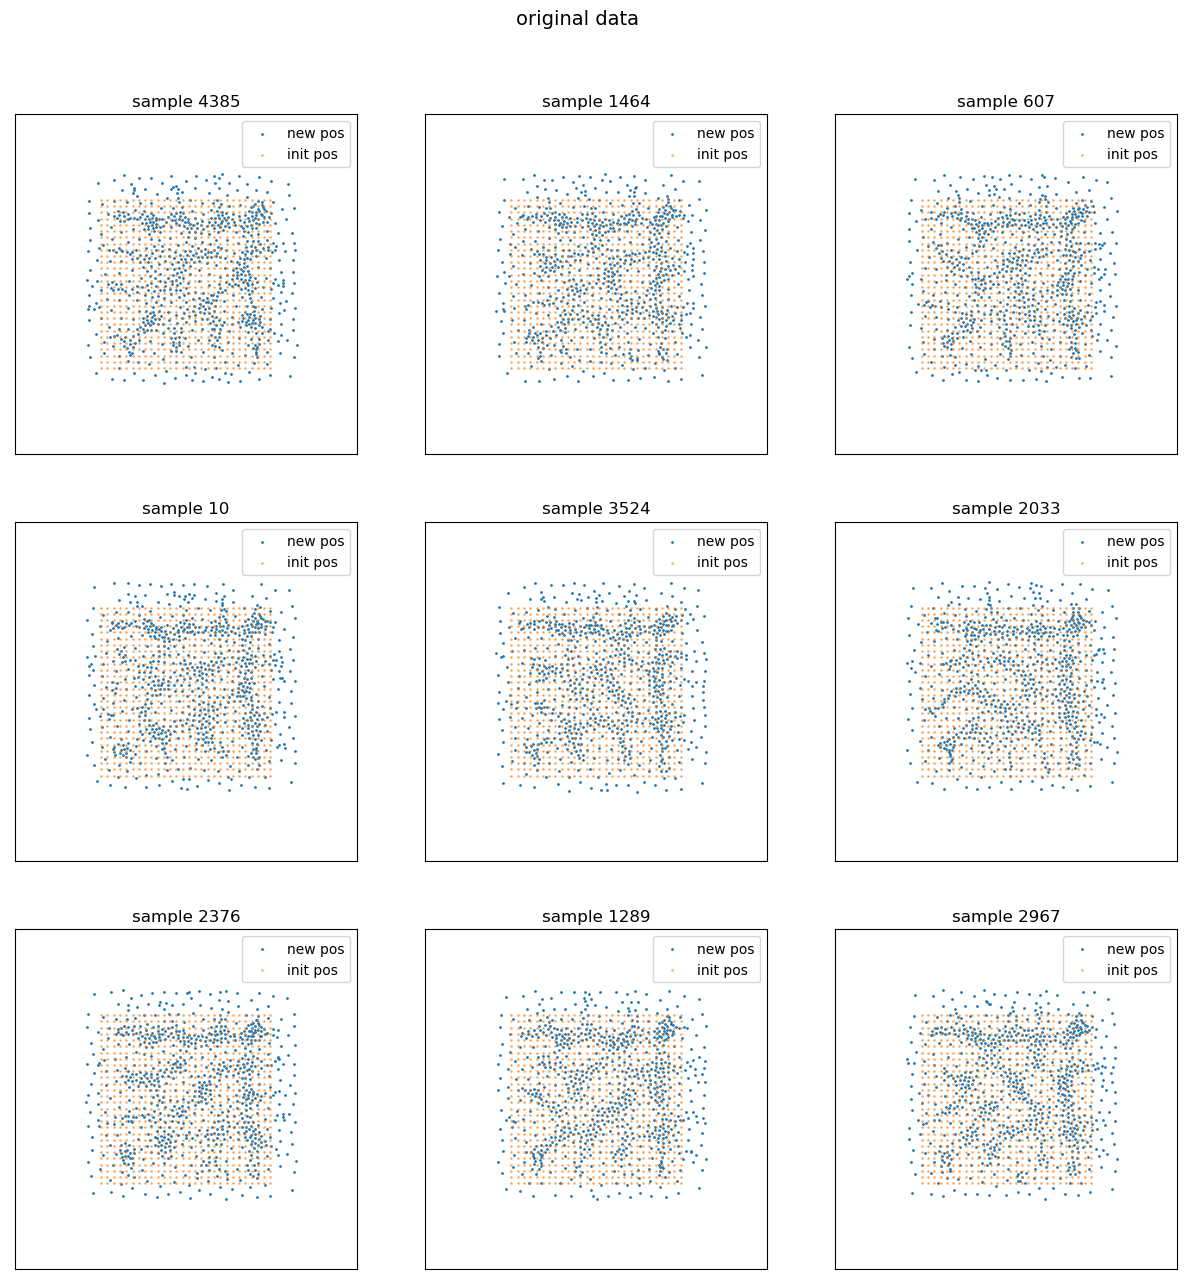

In [8]:
show_dataset(positions, 'original data')

In [9]:
displacement = positions - init_pos
displacement = displacement.reshape((-1, 28, 28, 2))

In [10]:
with h5py.File(os.getcwd()+"/original_data", 'w') as file:
    file.create_dataset(name='dataset', shape=(displacement.shape[0], 28, 28, 2), dtype='float32',
                        data=displacement, compression='gzip')

In [8]:
def data_augument(dataset, noise_scales):
    augumented_dataset = [dataset]
    for noise_scale in noise_scales:
        augumented_dataset.append(dataset + np.random.normal(scale=noise_scale, size=dataset.shape))
    return np.concatenate(augumented_dataset, axis=0)

In [9]:
noise_scales = np.linspace(0, 0.05, 9)
augumented_positions = data_augument(positions, noise_scales)

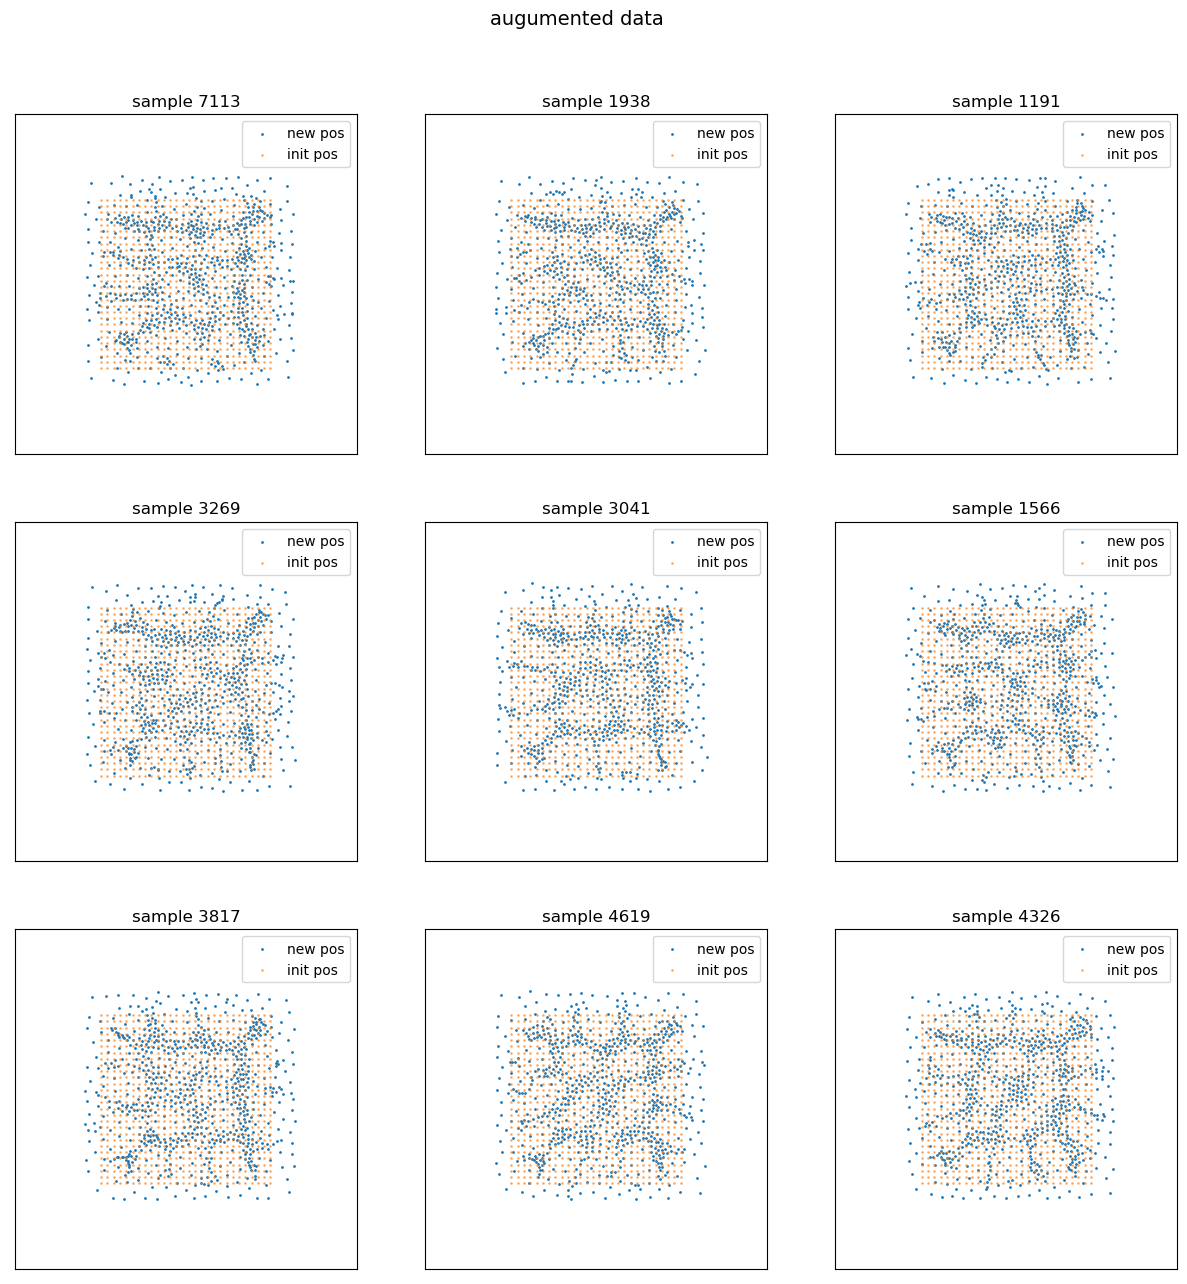

In [10]:
show_dataset(augumented_positions, 'augumented data')

In [18]:
augmented_displacement = augumented_positions - init_pos
augmented_displacement = augmented_displacement.reshape((-1, 28, 28, 2))

In [29]:
with h5py.File(os.getcwd()+"/augmented_data", 'w') as file:
    file.create_dataset(name='dataset', shape=(augmented_displacement.shape[0], 28, 28, 2), dtype='float32',
                        data=augmented_displacement, compression='gzip')